##pydtw: Aligning influenza outbreaks from year to year

The influenza-like illness (ILI) rate measures how prevalent the flu is in a population, and is used by the CDC to monitor the onset and intensity of seasonal influenza.  As ILI evolves over time, it clearly has a yearly periodic structure that is sometimes misaligned in time.  We can use dynamic time warping as a way to align yearly series (perhaps as a pre-processing step before fitting a model or building a predictive system). 

In [1]:
import pydtw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
matplotlib.rcParams['figure.figsize'] = (12.0, 4.0)

Populating the interactive namespace from numpy and matplotlib


We can load the ILI rate data and see how ILI varies over the course of 10 years, 2004-2010 (each x-tick is a week).  

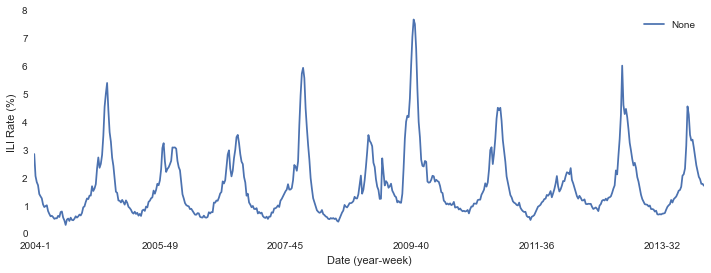

In [2]:
# read from csv file
flu_df = pd.read_csv('example_data/CDC_ILI_NATIONAL.csv', header=1)
# add date to dataframe
flu_df['date'] = ["%s-%s"%(yr, wk) for yr,wk in zip(flu_df.YEAR, flu_df.WEEK)]
flu_df.plot(x='date', y='% WEIGHTED ILI')
plt.ylabel("ILI Rate (%)")
plt.xlabel("Date (year-week)")
plt.show()

We can see a characteristic yearly peak in the middle of flu season (sometimes a double peak in like in 2005 and 2006).  How do those peaks align?  We can overlay a few disjoint years and see.  

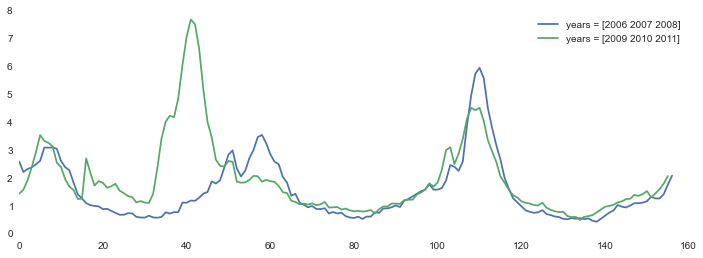

In [3]:
# compare two sets of years
years0 = np.arange(2006, 2009)
years1 = np.arange(2009, 2012)
ili_0 = flu_df['% WEIGHTED ILI'][flu_df.YEAR.isin(years0)]
ili_1 = flu_df['% WEIGHTED ILI'][flu_df.YEAR.isin(years1)]
plt.plot(ili_0, label="years = %s"%np.str(years0))
plt.plot(ili_1, label="years = %s"%np.str(years1))
plt.legend()
plt.show()

We can see that the peaks roughly correspond, however in 2010 the peak was quite early.  In order to build a predictive model of ILI, we would like to use information from prior years, including the ramp up, intensity and duration of each peak.  In order to do that, we would like to figure out which weeks correspond between years.  Concretely, which week in 2006 correspond to week 40 in 2009?  Clearly week 40 in 2006 (blue line) is starting to ramp up, whereas week 40 in 2009 (green line) is peaking. 

We can use DTW to find the discrete warping that best aligns the two sequences.  

In [4]:
# pydtw call, returns a DTW distance, a distance/cost matrix, and a 
# list of paths that can be used to align the series
dist, dmat, path = pydtw.dtw(ili_0, ili_1)

The `dtw` call returns a DTW distance, a distance matrix

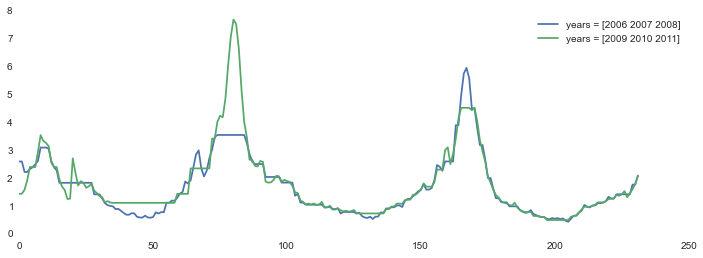

In [5]:
# align paths and plot alignment 
ili_0_aligned = ili_0.values[path[0]]
ili_1_aligned = ili_1.values[path[1]]

# plot aligned values
plt.plot(ili_0_aligned, label="years = %s"%np.str(years0))
plt.plot(ili_1_aligned, label="years = %s"%np.str(years1))
plt.legend()
plt.show()

We can also view the correspondence between indices by visualizing the path.  We can see how theBelow we overlay the path on the cost matrix

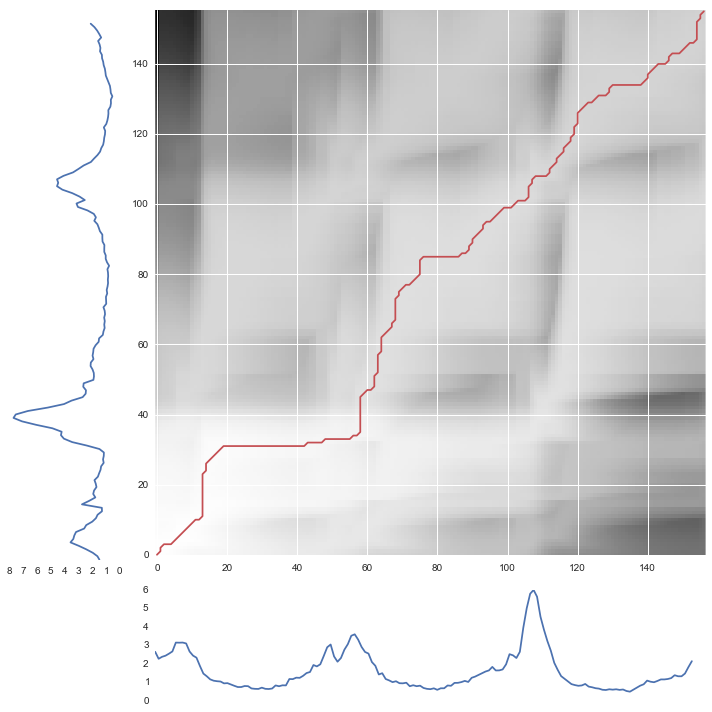

In [6]:
pydtw.plot_alignment(ili_0, ili_1, path, dmat)
